##SUPERMARKET SALES ANALYSIS

Importando librerias

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import numpy

Variables Globales

In [11]:
global df_ventas
global df_ventas_limpio

*Importando la Base de Datos .csv*

In [88]:
def obtencion_datos():
    global df_ventas
    df_ventas = pd.read_csv('reporte_ventas.csv', sep = ',')
obtencion_datos()

Normalización y limpieza de los datos

In [89]:
#Formateamos el tipo de dato de las fechas a uno adecuado
df_ventas['fecha_pedido'] = pd.to_datetime(df_ventas['fecha_pedido'], format='%Y-%m-%d')
df_ventas['fecha_envio'] = pd.to_datetime(df_ventas['fecha_envio'], format='%Y-%m-%d')

#Eliminar repetidos
df_ventas_limpio = df_ventas.drop_duplicates()

#eliminamos registros de prueba
def eliminar_registros_prueba(df):
  return df.drop(df[df['nombre_cliente'] == 'prueba'].index)
df_ventas_limpio = eliminar_registros_prueba(df_ventas_limpio)

#reiniciamos el index
df_ventas_limpio.reset_index(inplace=True)
df_ventas_limpio.drop(columns=['index'], inplace=True)

#Reemplazamos los nombres de clientes NaN por el valor "missing"
df_ventas_limpio['nombre_cliente'].fillna('missing', inplace=True)


1. ¿Cuáles son las ventas totales por año? ¿Y qué año tuvo mejor desempeño? (Pablo)

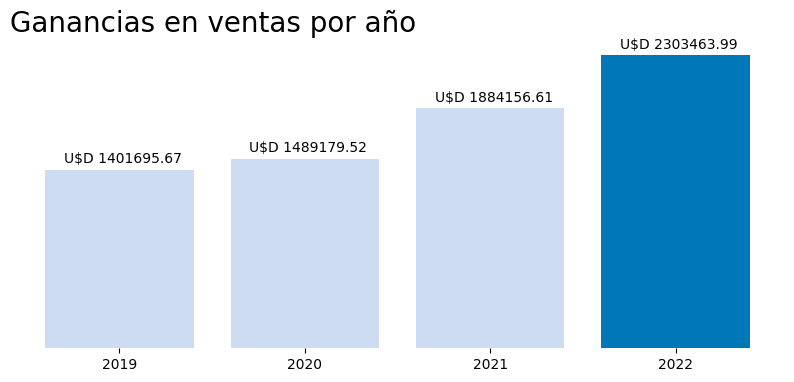

In [90]:
#Code here
def pregunta_1():
  df_ventas_ano = df_ventas_limpio[['fecha_pedido', 'total_venta']].copy()
  df_ventas_ano['año'] = df_ventas_ano['fecha_pedido'].dt.year
  df_ventas_ano.drop('fecha_pedido', axis=1, inplace=True)
  df_ventas_ano = df_ventas_ano.groupby('año').aggregate('sum')
  df_ventas_ano

  fig, ax = plt.subplots(figsize=(10,4))
  x = df_ventas_ano.index
  y = df_ventas_ano['total_venta']
  ax.bar(x,y, width=0.8, color=['#CDDBF3','#CDDBF3','#CDDBF3','#0077b6'])
  plt.xticks([2019, 2020, 2021, 2022])
  plt.box(False)
  plt.gca().yaxis.set_visible(False)
  plt.title('Ganancias en ventas por año', loc='left', fontsize=20)

  for bar in ax.patches:
    x = bar.get_x() + 0.1
    y = bar.get_height()
    valor = f'U$D {y}'
    y_position = y + 50000
    ax.text(x,y_position,valor)

pregunta_1()


2. ¿Cuáles son los 7 productos que más ganancias mostraron durante todo el periodo?

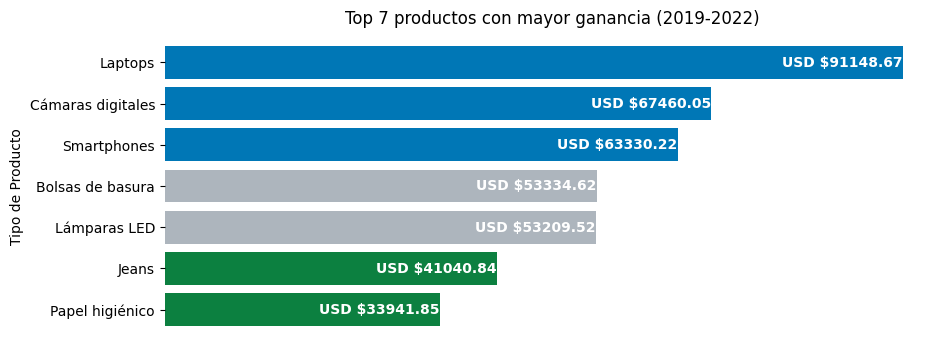

In [162]:
#Code here
def pregunta_2():
  # Definimos las variables globales
  global df_ventas_limpio
  df_top_ganancias = df_ventas_limpio[['tipo_producto', 'total_ganancia']].copy()
  df_top_ganancias = df_top_ganancias.groupby('tipo_producto').agg({'total_ganancia': 'sum'}).reset_index()
  df_top_ganancias = df_top_ganancias.sort_values('total_ganancia', ascending=False)
  # return df_top_ganancias[df_top_ganancias['total_ganancia'] > 0]
  df_top_ganancias = df_top_ganancias.head(7)
  df_top_ganancias = df_top_ganancias.sort_values('total_ganancia', ascending=True)
  # return df_top_ganancias
  # print(df_top_ganancias.to_string(index=False))
  # Configuración de la figura y el eje
  fig, ax = plt.subplots(figsize=(10, 4))
  ejeX = df_top_ganancias['tipo_producto']
  ejeY = df_top_ganancias['total_ganancia']
  colores = ['#0C8040','#0C8040','#adb5bd','#adb5bd','#0077b6','#0077b6','#0077b6']
  barras = ax.barh(ejeX, ejeY, color=colores, align='center')
  for barra in barras:
    width = barra.get_width()
    ax.text(width, barra.get_y() + barra.get_height() / 2, f'USD ${width:.2f}', ha='right', va='center', color='white', weight='bold')
  ax.set_title('Top 7 productos con mayor ganancia (2019-2022)')
  ax.set_xlabel('Total de Ganancias')
  ax.set_ylabel('Tipo de Producto')
  plt.box(False)
  plt.gca().xaxis.set_visible(False)
  # Mostrar el gráfico
  plt.show()

pregunta_2()


3. ¿Si separamos las ventas totales por año y por regiones ¿Qué insight podemos obtener de nuestras ventas?

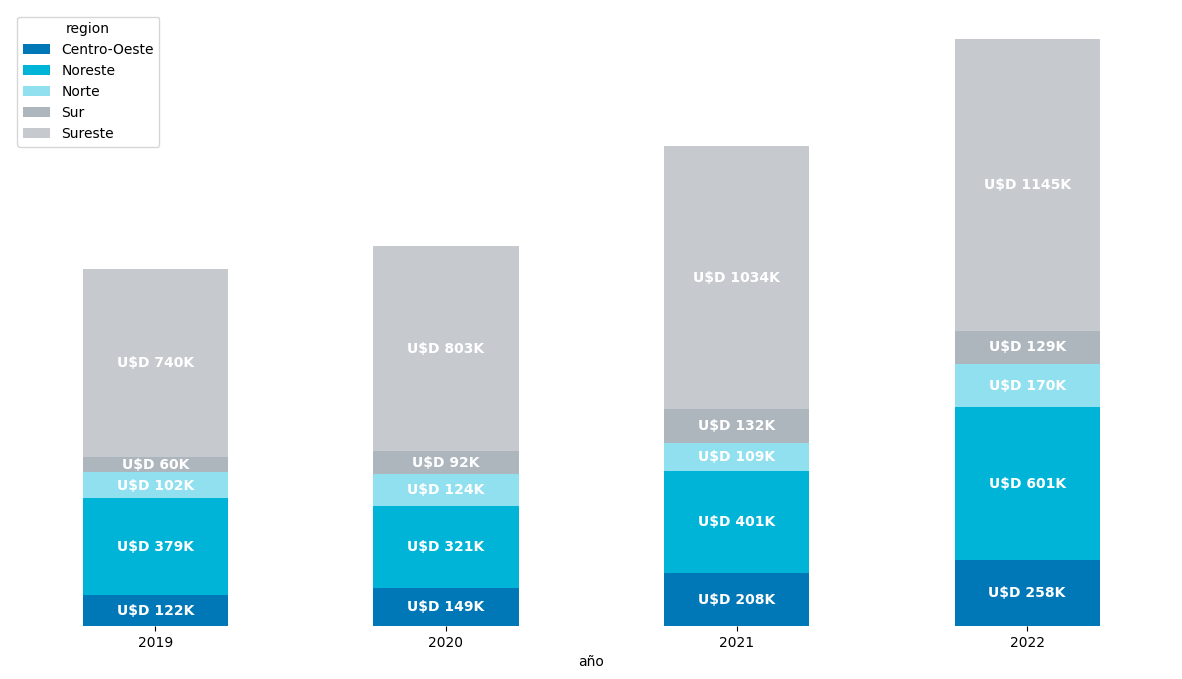

In [155]:
#Code here
def pregunta_3():
  #Preparamos los datos
  import math
  global df_ventas_limpio
  df_ventas_anos_region = df_ventas_limpio[['fecha_pedido', 'region', 'total_venta']].copy()
  df_ventas_anos_region['año'] = df_ventas_anos_region['fecha_pedido'].dt.year
  df_ventas_anos_region.drop('fecha_pedido', axis=1, inplace=True)
  columna = df_ventas_anos_region['año']
  fila = df_ventas_anos_region['region']
  total_venta = df_ventas_anos_region['total_venta']
  df_ventas_anos_region = pd.crosstab(columna, fila, values=total_venta, aggfunc='sum')
  #Graficamos
  colores=['#0077b6', '#00b4d8', '#90e0ef', '#adb5bd', '#C6C9CD']
  ax = df_ventas_anos_region.plot(kind='bar', stacked=True, figsize=(15,8), color=colores)
  plt.xticks(rotation=0)
  for container in ax.containers:
    labels = []
    for valor in container:
      labels.append(f'U$D {math.ceil(round(valor.get_height(), -3))}'[:-3]+'K')
    ax.bar_label(container, labels=labels, label_type='center', color='white', fontweight='bold')
  
  plt.box(False)
  plt.gca().yaxis.set_visible(False)

pregunta_3()

4. ¿Cuál es el método de envío más utilizado por los clientes del Supermercado? ¿Es proporcional para B2B y B2C?

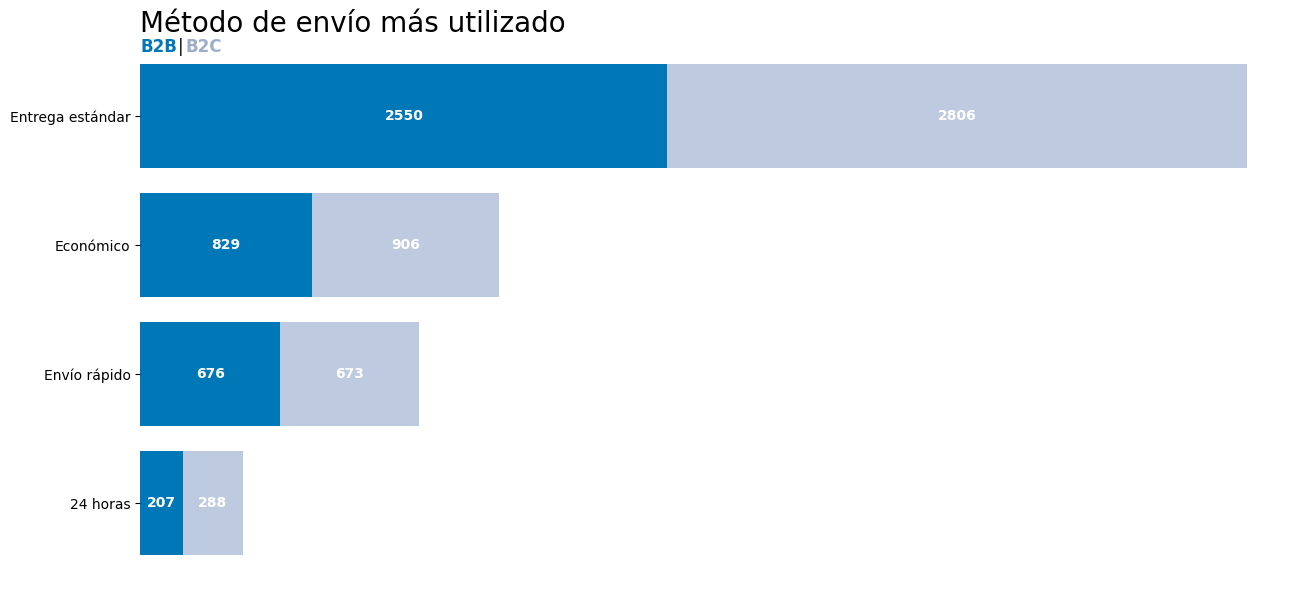

In [17]:
#Code here
def pregunta_4():
  #Preparando los datos
  global df_ventas_limpio
  df_modo_envio = df_ventas_limpio[['modo_envio', 'segmento_cliente']].copy()
  modo_envio = df_modo_envio['modo_envio']
  segmento = df_modo_envio['segmento_cliente']
  df_modo_envio = pd.crosstab(index=modo_envio, columns=segmento).sort_values('B2B')
  #Graficando
  fig, ax = plt.subplots(figsize=(15,7))
  plt.box(False)
  plt.gca().xaxis.set_visible(False)
  plt.title('Método de envío más utilizado', loc='left', fontsize=20)
  plt.text(0,3.5,'B2B', color='#0077b6', fontweight='bold', fontsize=12)
  plt.text(180,3.5,'|', fontsize=12)
  plt.text(220,3.5,'B2C', color='#9CACC9', fontweight='bold', fontsize=12)
  x = df_modo_envio.index
  y1 = df_modo_envio['B2B']
  y2 = df_modo_envio['B2C']
  ax.barh(x, y1, color='#0077b6')
  ax.barh(x, y2, left=y1, color='#BECADF')
  for container in ax.containers:
    ax.bar_label(container, label_type='center', labels = (), color="white", fontweight="bold")

pregunta_4()

5. ¿Cuáles son las ventas totales por trimestre en el estado de Sao Paulo? (Everardo)

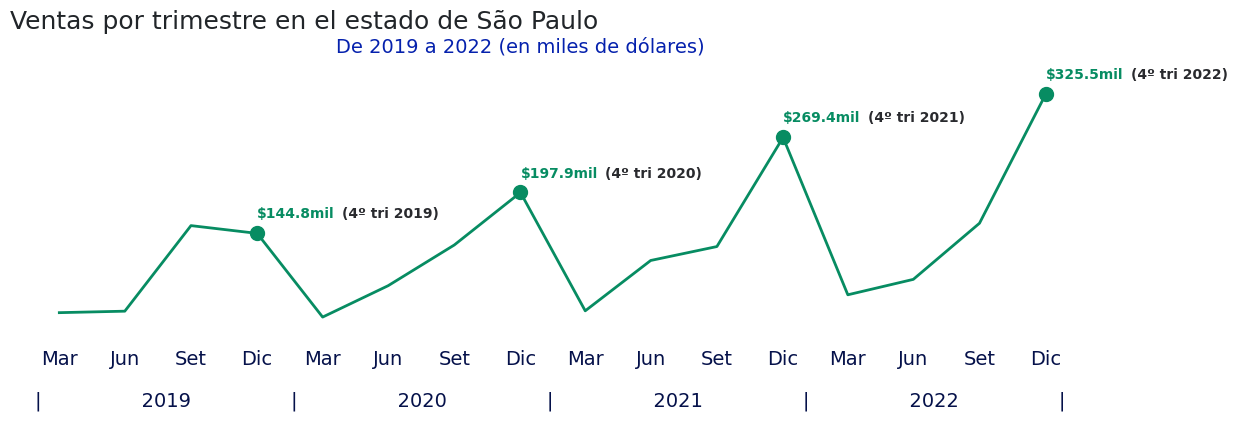

In [18]:
#Code here
def pregunta_5():
  # # Definimos las variables globales
  global df_ventas_limpio
  df_ventas_sp = df_ventas_limpio.copy()
  df_ventas_sp = df_ventas_sp.query('estado == "São Paulo"')[["fecha_pedido", "total_venta"]]
  # Establece la columna fecha_pedido como índice del DataFrame df_ventas_sp
  df_ventas_sp.set_index('fecha_pedido', inplace=True)
  # Aplica la función sum en el dataframe para calcular la venta total por trimestre, redondea a dos decimales
  df_ventas_sp = df_ventas_sp.resample('Q').agg('sum')
  df_ventas_sp['total_venta'] = round(df_ventas_sp['total_venta'] / 1e3, 2)
  # Restablece el indice
  df_ventas_sp = df_ventas_sp.reset_index()

  # Área del gráfico
  fig, ax = plt.subplots(figsize=(14, 4))

  # Gráfico de linea
  puntos_a_marcar = [True if mes.month == 12 else False for mes in pd.to_datetime(df_ventas_sp['fecha_pedido'])]
  ax.plot(df_ventas_sp['fecha_pedido'], df_ventas_sp['total_venta'], lw=2, color='#078c62', marker='o',
  markersize=10, markerfacecolor='#078c62', markevery=puntos_a_marcar)

  # customizer
  ax.set_title('Ventas por trimestre en el estado de São Paulo', fontsize=18, color='#212529', loc='left')
  ax.text(0.3, 0.95, 'De 2019 a 2022 (en miles de dólares)', transform=ax.transAxes, color='#0521ad', fontsize=14)
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_yticklabels([])
  ax.set_yticks([])
  ax.set_frame_on(False)
  ax.xaxis.set_tick_params(labelsize=14, labelcolor='#05114a')
  ax.tick_params(axis='both', which='both', length=0)
  ax.yaxis.grid(False)
  ax.xaxis.grid(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  plt.ylim(0, 400)

  # Definiendo el intervalo entre trimestres y colocando los nombres de los meses en los labels
  ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
  x_labels = ['Mar', 'Jun', 'Set', 'Dic'] * 4
  ax.set_xticks(df_ventas_sp.fecha_pedido)
  ax.set_xticklabels(x_labels, ha='center')

  # Ajustando el eje x colocando un nivel encima de la granularidad por medio de la exposición del año
  texto = [16 * " " + str(i) + 16 * " " for i in range(2019, 2023)]
  ax.text(ax.get_xbound()[0] + 35, -80,
  f'|{texto[0]}|{texto[1]}|{texto[2]}|{texto[3]}|', fontsize=14, color='#05114a')

  # Etiquetas trimestrales (...)
  for i in range(3, len(df_ventas_sp["total_venta"]), 4):
      ax.text(x=ax.get_xticks()[i], y=df_ventas_sp['total_venta'][i] + 20,
      s=f"${df_ventas_sp['total_venta'][i].round(1)}mil", color='#078c62', weight='bold', fontsize=10)
      ax.text(x=ax.get_xticks()[i] + 118, y=df_ventas_sp['total_venta'][i] + 20,
      s=f"(4º tri {2019 + int(i/4)})", color='#292a2e', weight='bold', fontsize=10)

pregunta_5()

6. ¿Existe otro insight que puedas proporcionar?

In [19]:
#Code here
df_ventas_limpio

,fecha_pedido,fecha_envio,modo_envio,nombre_cliente,segmento_cliente,ciudad,estado,region,departamento_producto,tipo_producto,precio_base,precio_unit_sin_desc,descuento,precio_unit_venta,cantidad_pedido,total_venta,total_ganancia
0,2021-11-09,2021-11-12,Económico,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sureste,Ropa,Camisetas,409.70,445.33,0.000,445.33,2,890.66,71.26
1,2021-11-09,2021-11-12,Económico,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sureste,Ropa,Jeans,705.10,829.53,0.000,829.53,3,2488.59,373.29
2,2021-06-13,2021-06-17,Económico,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sureste,Productos de Limpieza,Toallitas desinfectantes,19.02,24.86,0.000,24.86,2,49.72,11.68
3,2020-10-12,2020-10-19,Entrega estándar,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sur,Ropa,Zapatillas,781.38,840.19,0.225,651.15,5,3255.75,-651.15
4,2020-10-12,2020-10-19,Entrega estándar,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sur,Productos de Limpieza,Papel higiénico,35.88,42.24,0.100,38.02,2,76.04,4.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8930,2021-09-30,2021-10-04,Entrega estándar,Enrique Santos,B2C,Rio de Janeiro,Rio de Janeiro,Sureste,Electrónicos,Smartphones,97.34,123.22,0.000,123.22,1,123.22,25.88
8931,2022-11-18,2022-11-22,Entrega estándar,Heitor Silveira,B2B,Jequié,Bahia,Noreste,Electrónicos,Smartphones,223.01,271.97,0.000,271.97,1,271.97,48.96
8932,2022-11-18,2022-11-22,Entrega estándar,Heitor Silveira,B2B,Jequié,Bahia,Noreste,Electrónicos,Cámaras digitales,121.23,140.15,0.000,140.15,5,700.75,94.60
8933,2019-01-22,2019-01-24,Económico,Isabel Araújo,B2C,João Pessoa,Paraíba,Noreste,Ropa,Vestidos,26.29,31.79,0.100,28.61,3,85.83,6.96
